In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from pandas import MultiIndex
idx = pd.Index([1, 2, 3], dtype="int64")  # Equivalent to Int64Index
warnings.filterwarnings('ignore')
import os

In [10]:
df = pd.read_csv("Diabetes-dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### IDENTIFYING DIMENSIONS

In [11]:
df.shape

(768, 9)

In [12]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### VARIABLE IDENTIFICATION

In [15]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### UNIVARIANT ANALYSIS

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


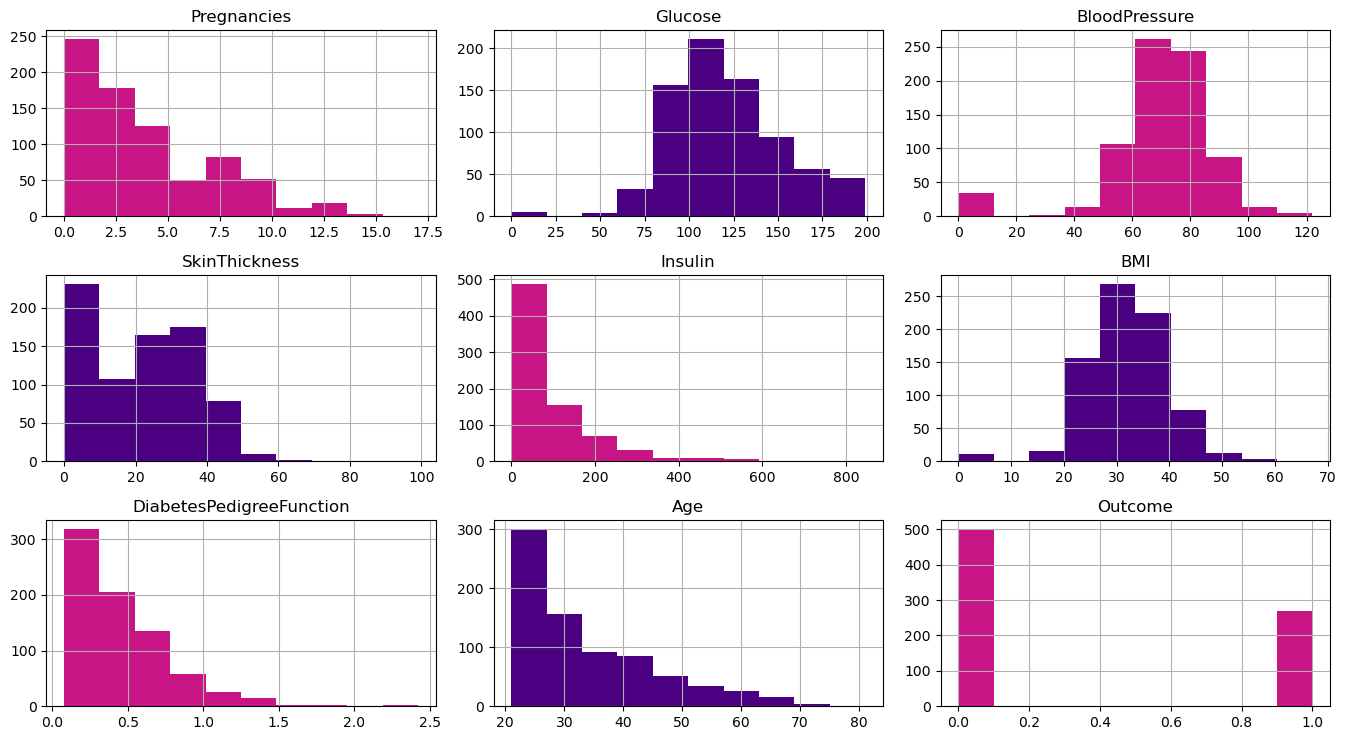

In [20]:
import matplotlib.pyplot as plt  

plt.rcParams["figure.figsize"] = [13.5, 7.5]  
plt.rcParams["figure.autolayout"] = True  

fig, axes = plt.subplots(3, 3)  

df['Pregnancies'].hist(ax=axes[0, 0], color="mediumvioletred")  
axes[0, 0].set_title("Pregnancies")  
df['Glucose'].hist(ax=axes[0, 1], color="indigo")
axes[0, 1].set_title("Glucose")
df['BloodPressure'].hist(ax=axes[0, 2], color="mediumvioletred")
axes[0, 2].set_title("BloodPressure")
df['SkinThickness'].hist(ax=axes[1, 0], color="indigo")
axes[1, 0].set_title("SkinThickness")
df['Insulin'].hist(ax=axes[1, 1], color="mediumvioletred")
axes[1, 1].set_title("Insulin")
df['BMI'].hist(ax=axes[1, 2], color="indigo")
axes[1, 2].set_title("BMI")
df['DiabetesPedigreeFunction'].hist(ax=axes[2, 0], color="mediumvioletred")
axes[2, 0].set_title("DiabetesPedigreeFunction")
df['Age'].hist(ax=axes[2, 1], color="indigo")
axes[2, 1].set_title("Age")
df['Outcome'].hist(ax=axes[2, 2], color="mediumvioletred")
axes[2, 2].set_title("Outcome")

plt.tight_layout()
plt.show()

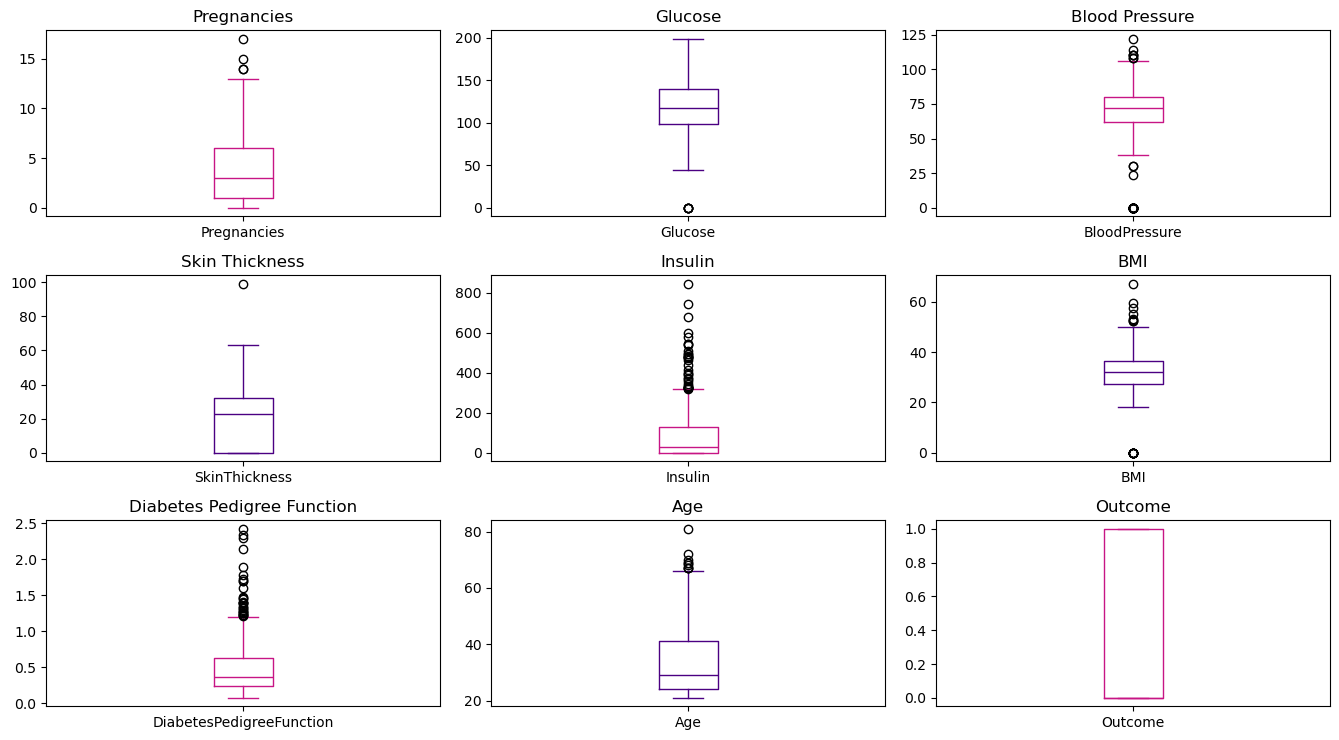

In [22]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['Pregnancies'].plot.box(title="Pregnancies", ax=axis[0, 0], color="mediumvioletred")
df['Glucose'].plot.box(title="Glucose", ax=axis[0, 1], color="indigo")
df['BloodPressure'].plot.box(title="Blood Pressure", ax=axis[0, 2], color="mediumvioletred")
df['SkinThickness'].plot.box(title="Skin Thickness", ax=axis[1, 0], color="indigo")
df['Insulin'].plot.box(title="Insulin", ax=axis[1, 1], color="mediumvioletred")
df['BMI'].plot.box(title="BMI", ax=axis[1, 2], color="indigo")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function", ax=axis[2, 0], color="mediumvioletred")
df['Age'].plot.box(title="Age", ax=axis[2, 1], color="indigo")
df['Outcome'].plot.box(title="Outcome", ax=axis[2, 2], color="mediumvioletred")

plt.tight_layout()
plt.show()

### BIVARIANT ANALYSIS

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


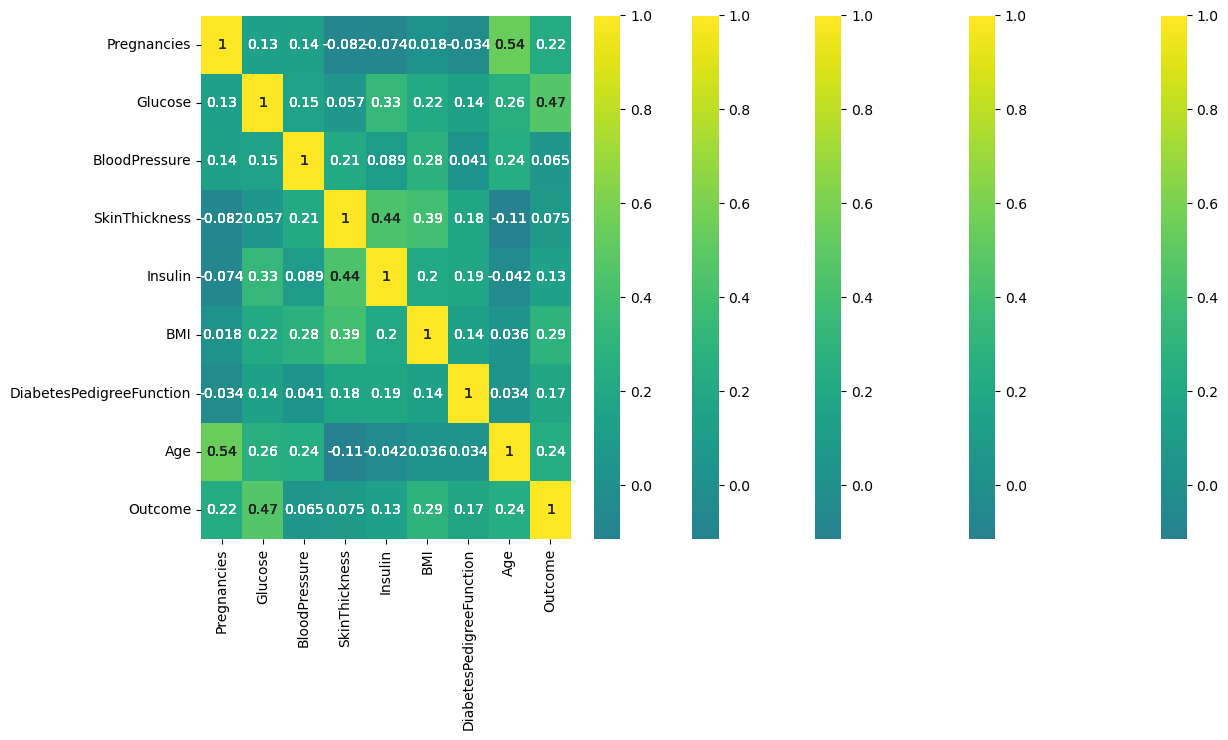

In [31]:
dataplot = sns.heatmap(df.corr(), annot = True, cmap = 'viridis', center = 0)
plt.show()

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

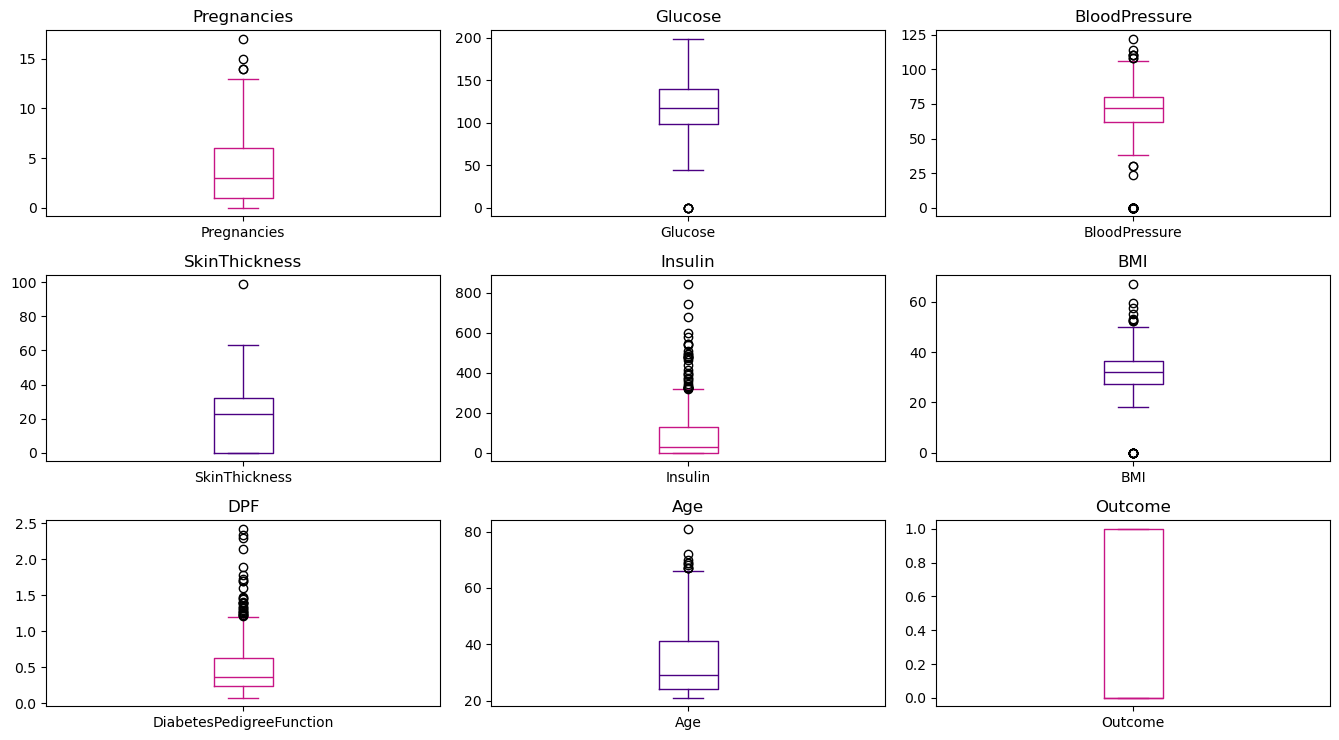

In [34]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(3, 3)

features = [
    ('Pregnancies', 'mediumvioletred'),
    ('Glucose', 'indigo'),
    ('BloodPressure', 'mediumvioletred'),
    ('SkinThickness', 'indigo'),
    ('Insulin', 'mediumvioletred'),
    ('BMI', 'indigo'),
    ('DiabetesPedigreeFunction', 'mediumvioletred'),
    ('Age', 'indigo'),
    ('Outcome', 'mediumvioletred')
]

for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    df[feature].plot.box(title=feature.replace('DiabetesPedigreeFunction', 'DPF'), 
                        ax=axes[row][col], 
                        color=color)

plt.tight_layout()
plt.show()

# <span style="color:BLACK">CHECKING HIGHLY CORRELATED ATTRIBUTES.</span>



In [37]:
plt.rcParams['figure.figsize'] = (20, 8)

features_row1 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
f1, axes1 = plt.subplots(1, 4)
for ax, feature in zip(axes1, features_row1):
    sns.boxplot(x='Outcome', y=feature, data=df, ax=ax, palette="RdPu")
f1.tight_layout()

features_row2 = ['BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']
f2, axes2 = plt.subplots(1, 4)
for ax, feature in zip(axes2, features_row2):
    sns.boxplot(x='Outcome', y=feature, data=df, ax=ax, palette="RdPu")
f2.tight_layout()

In [43]:
for i in range(len(df.columns)-1):
    for j in range(i+1,len(df.columns)):
        if 0.5<=df[df.columns[i]].corr(df[df.columns[j]]):
            print("We can drop either "+str(df.columns[i])+" or "+str(df.columns[j]))

We can drop either Pregnancies or Age


### MISSING VALUE TREATMENT

In [51]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there seem to be no missing values

### OUTLIER TREATMENT

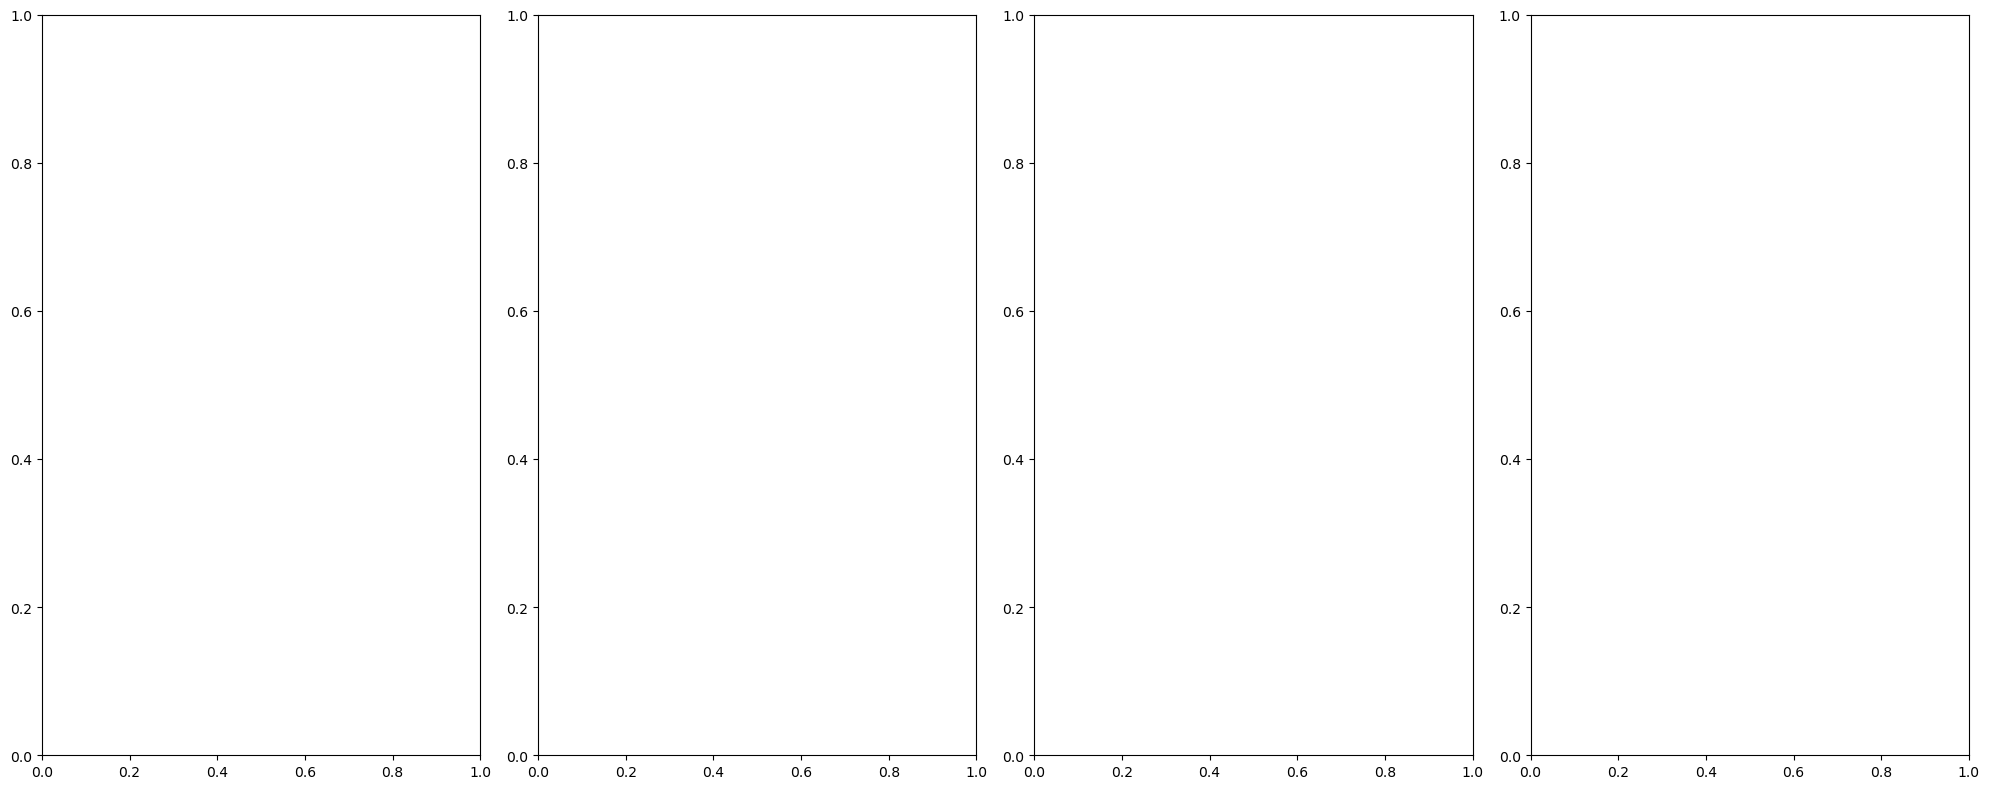

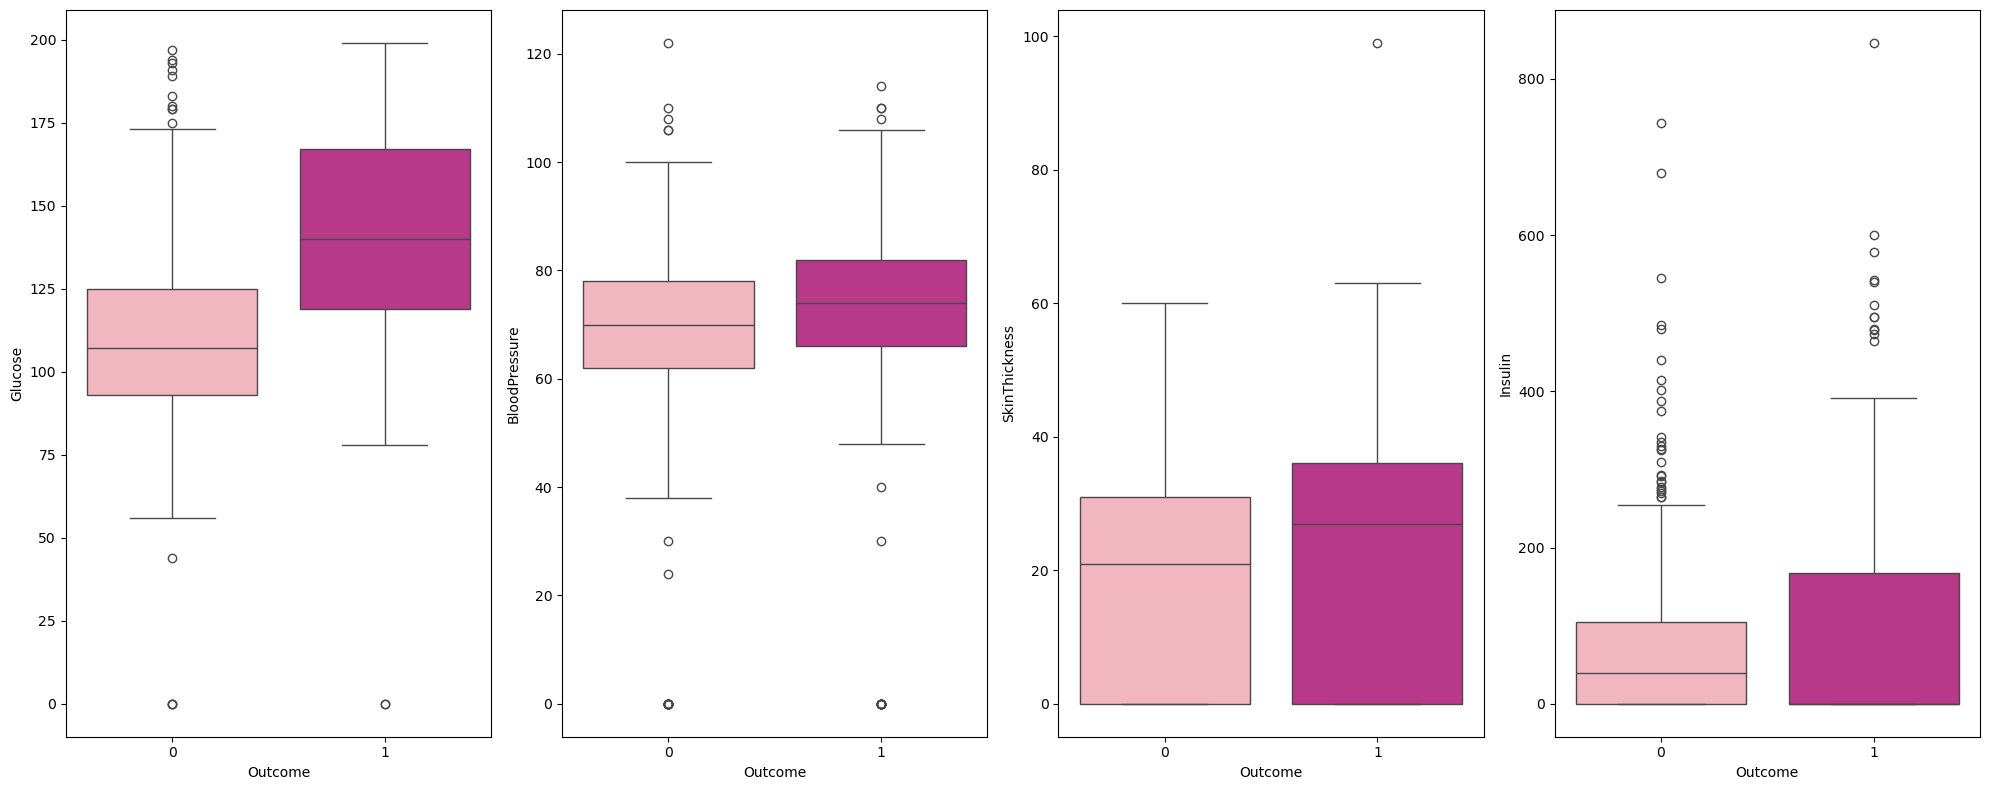

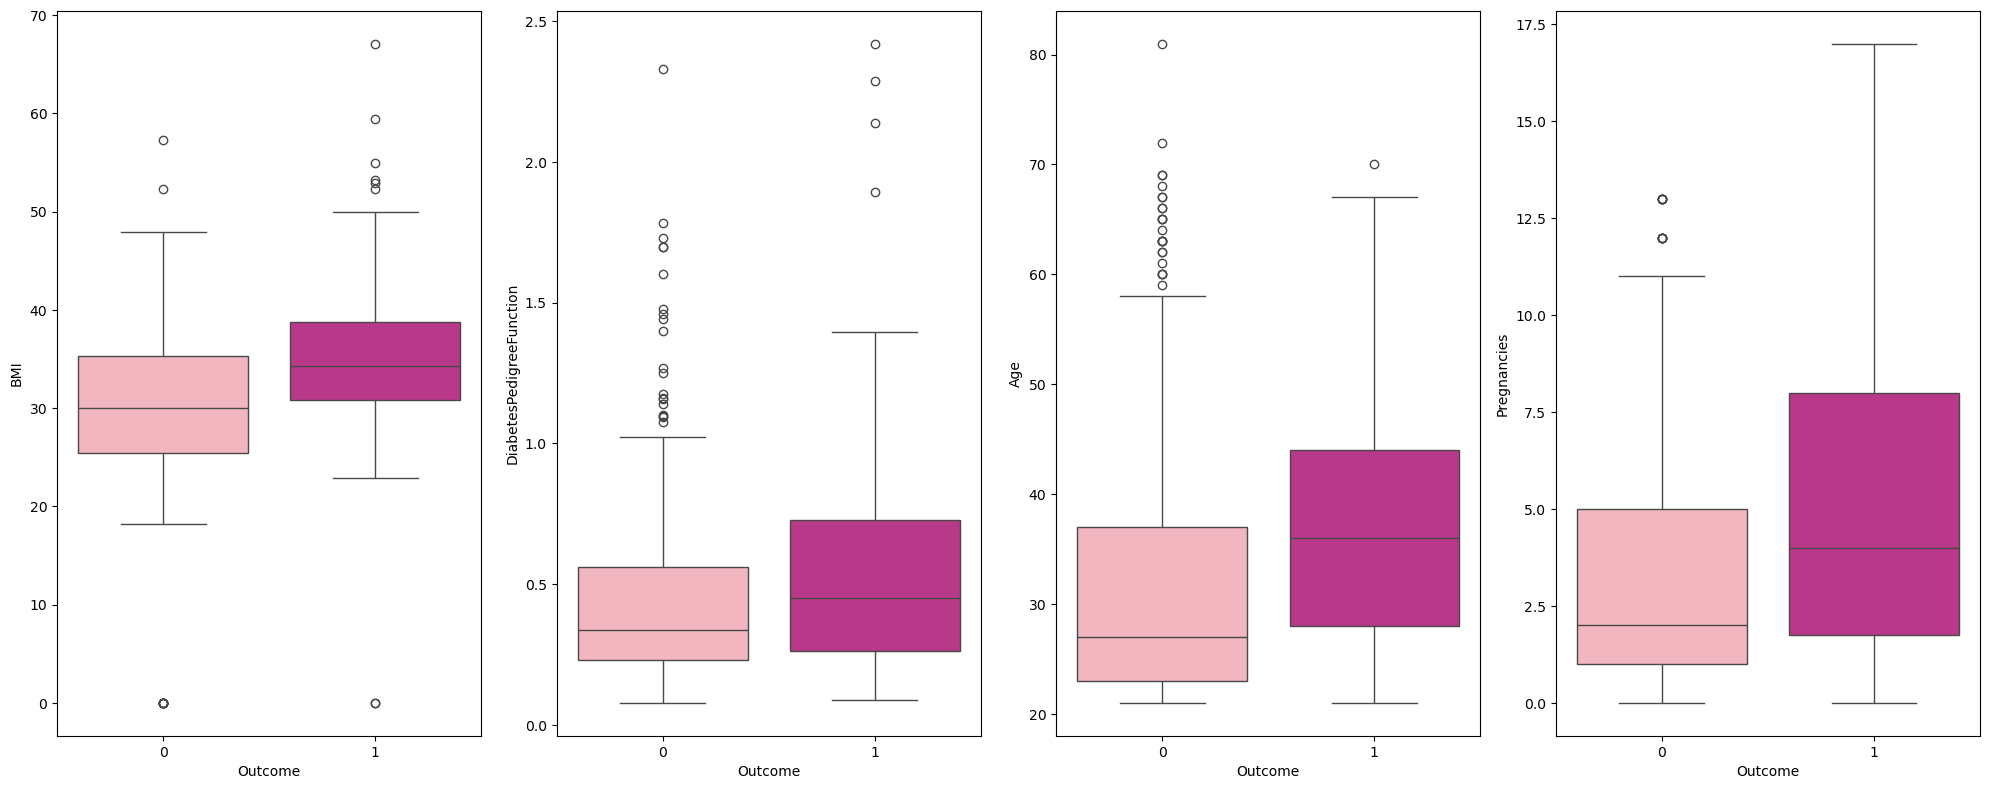

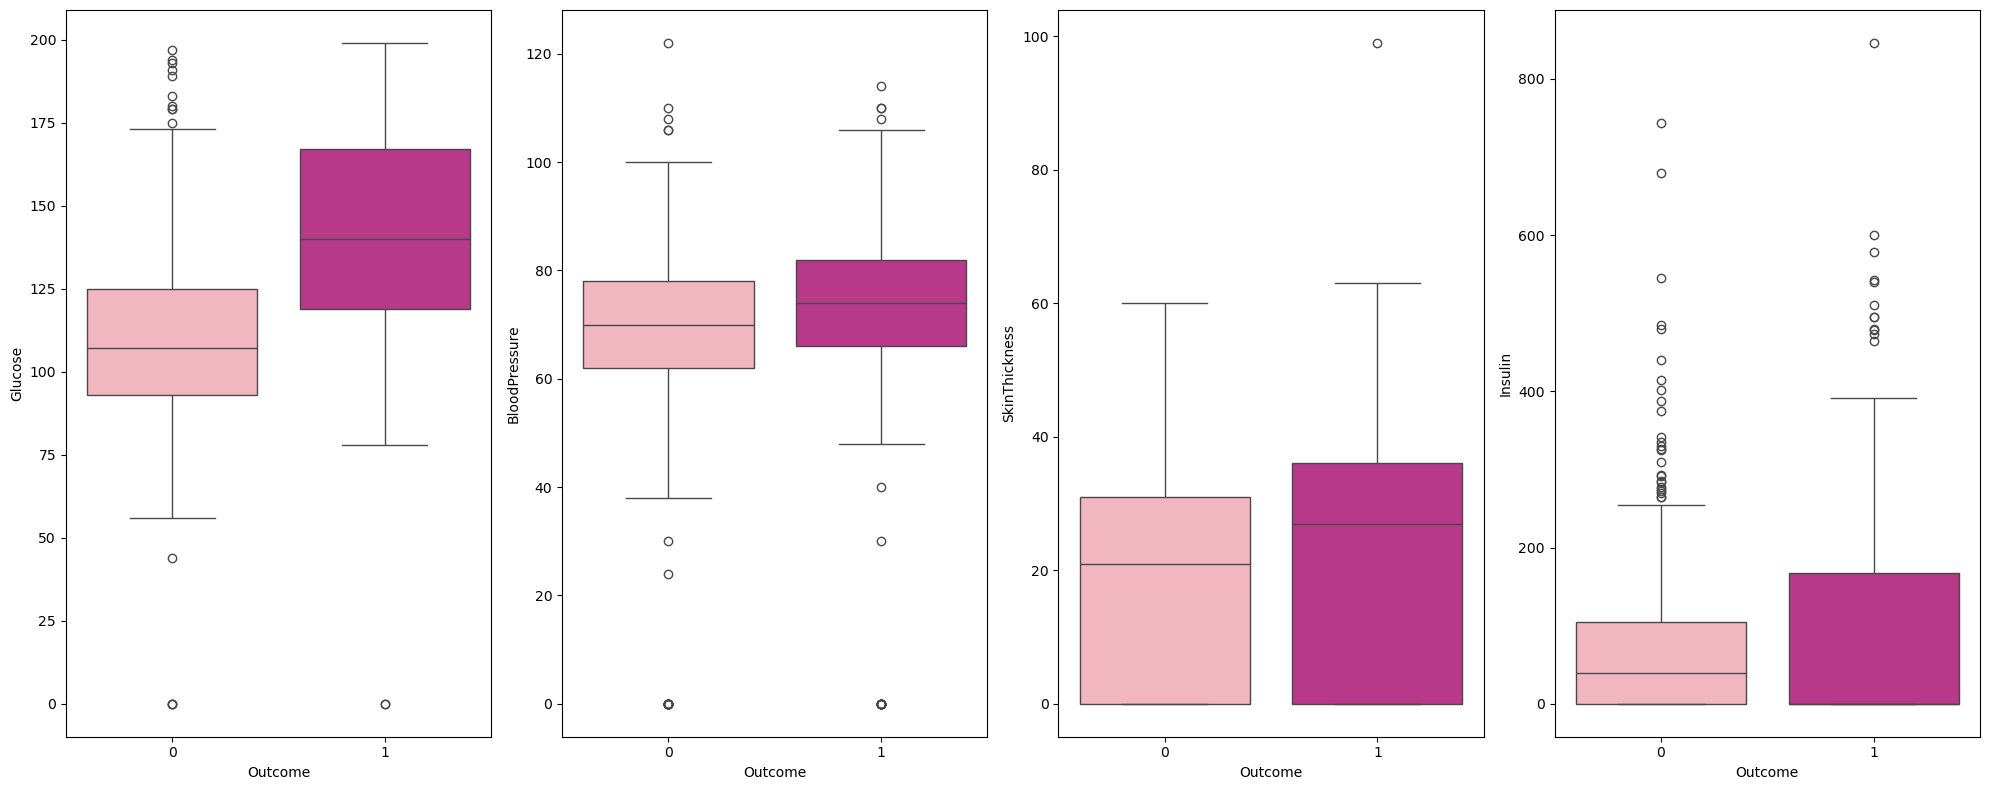

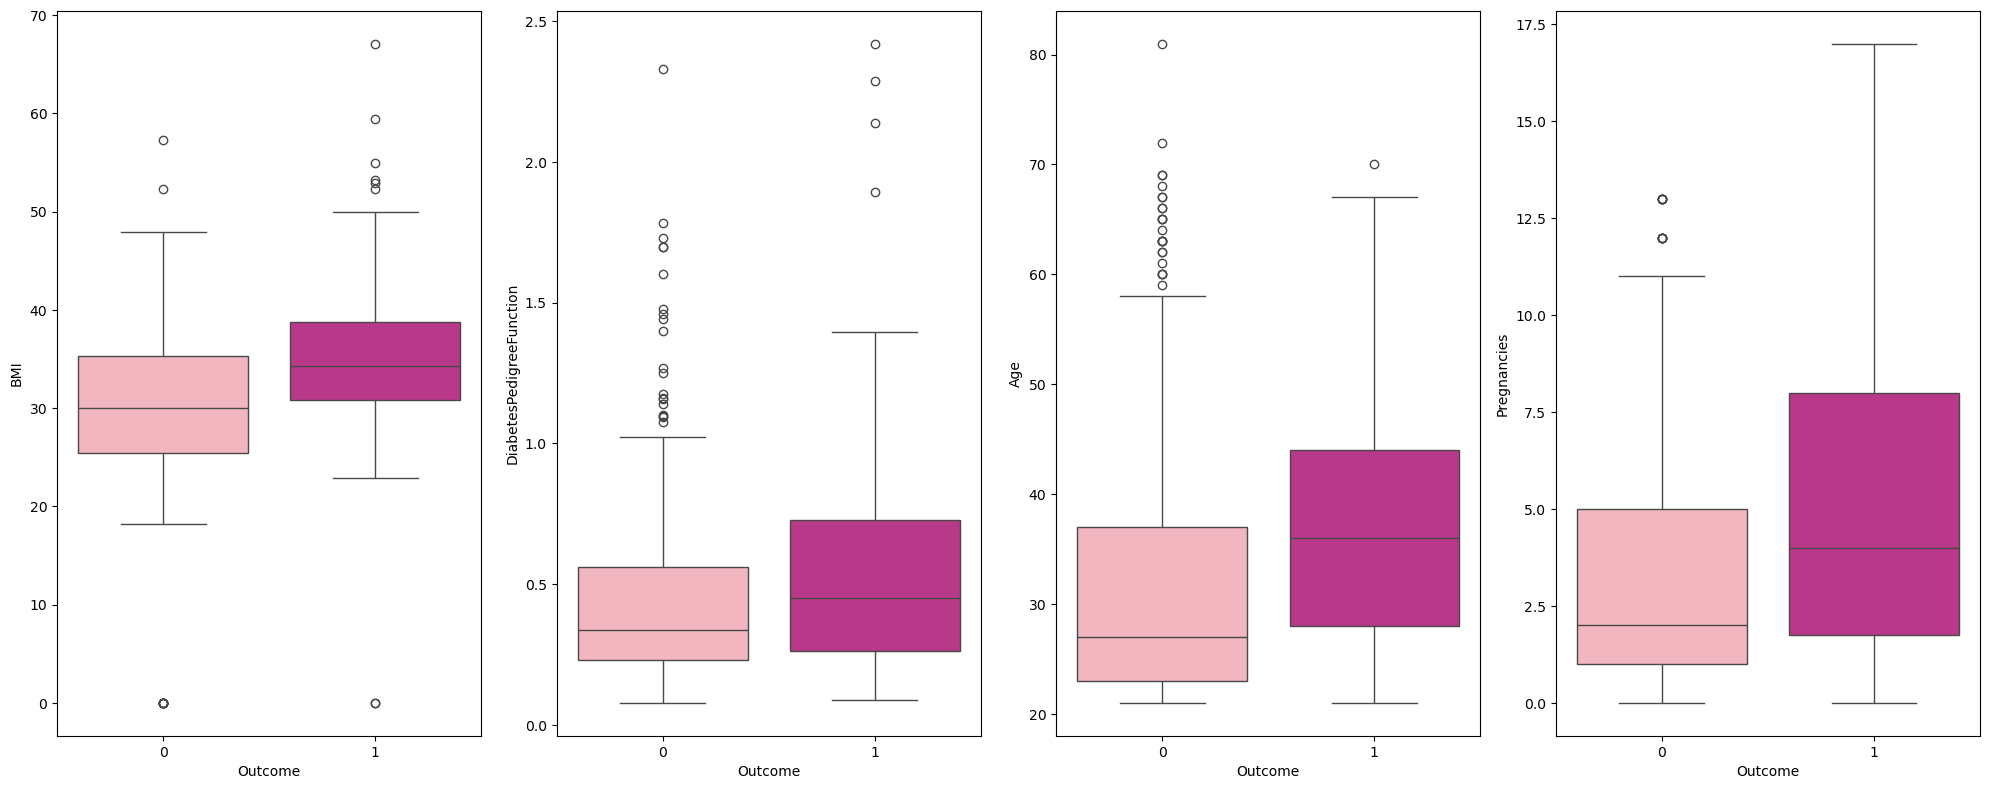

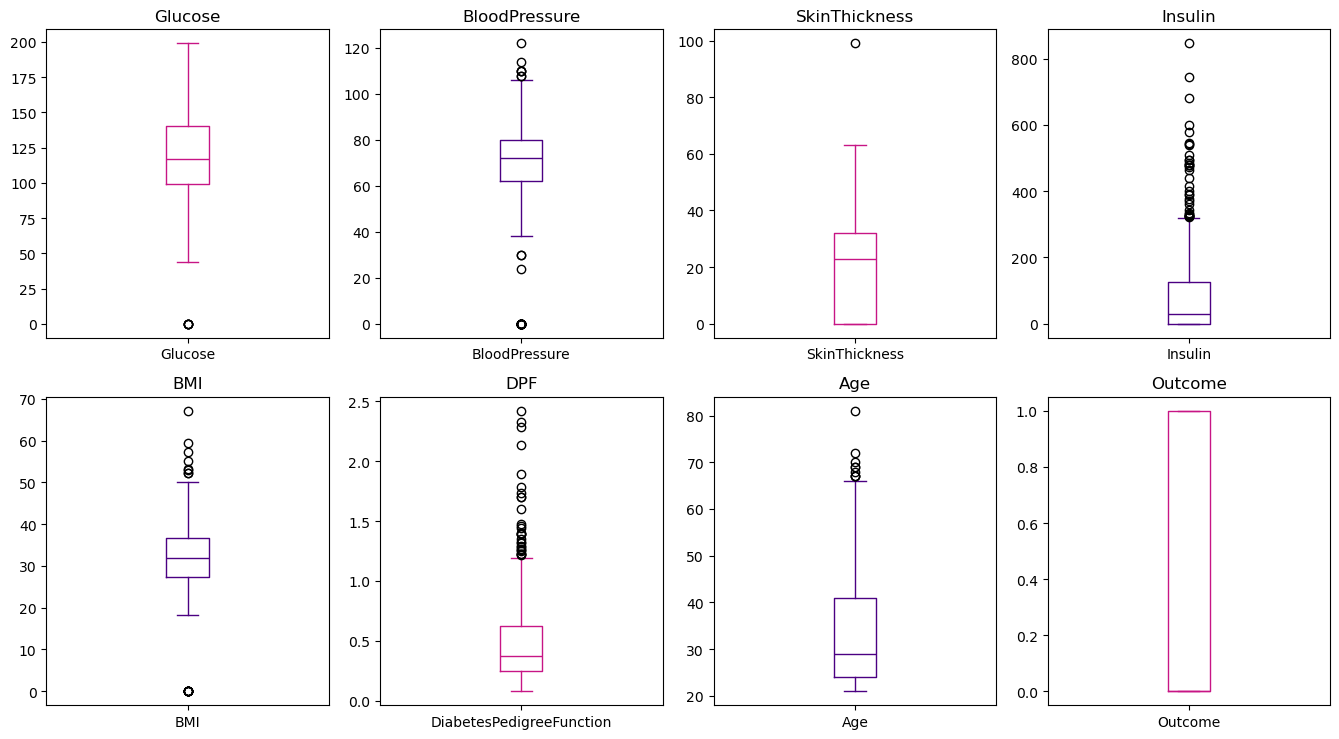

In [54]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(2, 4)

plot_config = [
    ('Glucose', 'mediumvioletred', axes[0, 0]),
    ('BloodPressure', 'indigo', axes[0, 1]),
    ('SkinThickness', 'mediumvioletred', axes[0, 2]),
    ('Insulin', 'indigo', axes[0, 3]),
    ('BMI', 'indigo', axes[1, 0]),
    ('DiabetesPedigreeFunction', 'mediumvioletred', axes[1, 1]),
    ('Age', 'indigo', axes[1, 2]),
    ('Outcome', 'mediumvioletred', axes[1, 3])
]

for feature, color, ax in plot_config:
    df[feature].plot.box(title=feature.replace('DiabetesPedigreeFunction', 'DPF'), ax=ax, color=color.lower())

plt.tight_layout()
plt.show()

In [56]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

__outlier treatment for glucose__

In [57]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Glucose'] < lower_limit, 'Glucose'] = df['Glucose'].mean()
df.loc[df['Glucose'] > upper_limit, 'Glucose'] = df['Glucose'].mean()

__outlier treatment for BloodPressure__

In [58]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['BloodPressure'] < lower_limit, 'BloodPressure'] = df['BloodPressure'].mean()
df.loc[df['BloodPressure'] > upper_limit, 'BloodPressure'] = df['BloodPressure'].mean()

__outlier treatment for SkinThickness__

In [61]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['SkinThickness'] < lower_limit, 'SkinThickness'] = df['SkinThickness'].mean()
df.loc[df['SkinThickness'] > upper_limit, 'SkinThickness'] = df['SkinThickness'].mean()

__outlier treatment for Insulin__

In [62]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Insulin'] < lower_limit, 'Insulin'] = df['Insulin'].mean()
df.loc[df['Insulin'] > upper_limit, 'Insulin'] = df['Insulin'].mean()

__outlier treatment for BMI__

In [63]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['BMI'] < lower_limit, 'BMI'] = df['BMI'].mean()
df.loc[df['BMI'] > upper_limit, 'BMI'] = df['BMI'].mean()

__outlier treatment for DiabetesPedigreeFunction__

In [68]:
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['DiabetesPedigreeFunction'] < lower_limit, 'DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].mean()
df.loc[df['DiabetesPedigreeFunction'] > upper_limit, 'DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].mean()

__outlier treatment for Age__

In [69]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Age'] < lower_limit, 'Age'] = df['Age'].mean()
df.loc[df['Age'] > upper_limit, 'Age'] = df['Age'].mean()

__outlier treatment for Outcome__

In [70]:
Q1 = df['Outcome'].quantile(0.25)
Q3 = df['Outcome'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Outcome'] < lower_limit, 'Outcome'] = df['Outcome'].mean()
df.loc[df['Outcome'] > upper_limit, 'Outcome'] = df['Outcome'].mean()

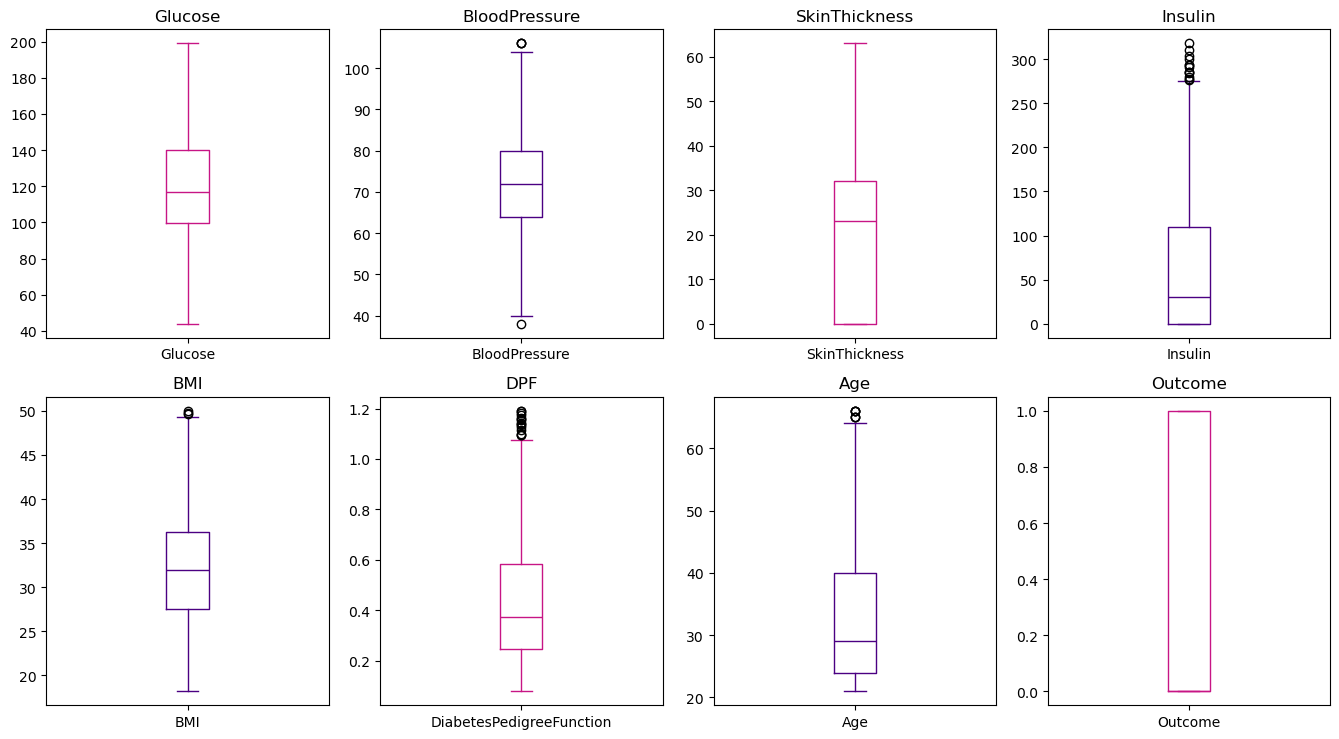

In [71]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(2, 4)

plot_config = [
    ('Glucose', 'mediumvioletred', axes[0, 0]),
    ('BloodPressure', 'indigo', axes[0, 1]),
    ('SkinThickness', 'mediumvioletred', axes[0, 2]),
    ('Insulin', 'indigo', axes[0, 3]),
    ('BMI', 'indigo', axes[1, 0]),
    ('DiabetesPedigreeFunction', 'mediumvioletred', axes[1, 1]),
    ('Age', 'indigo', axes[1, 2]),
    ('Outcome', 'mediumvioletred', axes[1, 3])
]

for feature, color, ax in plot_config:
    df[feature].plot.box(title=feature.replace('DiabetesPedigreeFunction', 'DPF'), ax=ax, color=color.lower())

plt.tight_layout()
plt.show()

In [72]:
df.to_csv('Diabetes-dataset_FS.csv', encoding='utf-8', index=False)